# 1. 중학 실력 Test 데이터

ISHERPA_2010 > TBL_WWW_SelfTest_Info, TBL_WWW_SelfTest_Wrong_Note_EduBase 테이블 사용

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='Malgun Gothic')
mpl.rcParams['font.size'] = 15  # 기본 글자 크기

## 1-1. 데이터 불러오기

In [2]:
dataset1 = pd.read_csv('./datasets/중학실력Test_문항별정오답.csv')
pd.set_option('display.max_columns', len(dataset1.columns))   # 중간에 생략되는 열들까지 보여주는 옵션
dataset1.head()


,idx,guid,st_year,Test_Name,Subject,Subject2,Grade,Grade2,Term,Test_Level,take_date,test_time,Test_Jumsu,QuizNum,QuizCode,QuizYN,QuizAnswer
0,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,20,40094723,N,④
1,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,19,40095385,Y,⑤
2,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,18,40094651,Y,6
3,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,17,40095295,Y,②
4,521308,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,2022,수수행대비,MM,MM,8,8,01;02,04;03,2022-08-19 20:01:02.977,1305,85,16,40095274,Y,①


## 1-2. 데이터 컬럼 설명

- idx : 인덱스
- guid : 회원아이디
- st_year : 년도
- Test_Name : 시험지명
- Subject : 교과
- Subject2 : 과목
- Grade : 학년
- Grade2 : 사용자가 선택한 학년
- Term : 학기
- Test_Level : 시험 난이도 (01 최하 ~ 05 최상)
- take_date : 시험응시일
- test_time : 제출시간(초)
- Test_Jumsu : 시험점수
- QuizNum : 시험순번
- QuizCode : 퀴즈코드(문항코드)
- QuizYN : 문항정오답
- QuizAnswer : 사용자입력답

In [3]:
dataset1['QuizNum'].nunique()

20

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250190 entries, 0 to 250189
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   idx         250190 non-null  int64 
 1   guid        250190 non-null  object
 2   st_year     250190 non-null  int64 
 3   Test_Name   247330 non-null  object
 4   Subject     250190 non-null  object
 5   Subject2    250190 non-null  object
 6   Grade       250190 non-null  int64 
 7   Grade2      250190 non-null  object
 8   Term        250190 non-null  object
 9   Test_Level  181360 non-null  object
 10  take_date   250190 non-null  object
 11  test_time   250190 non-null  int64 
 12  Test_Jumsu  250190 non-null  int64 
 13  QuizNum     250190 non-null  int64 
 14  QuizCode    250190 non-null  int64 
 15  QuizYN      250190 non-null  object
 16  QuizAnswer  229046 non-null  object
dtypes: int64(7), object(10)
memory usage: 32.4+ MB


### 1-2-1. 변수 선택

**변수 선택**  
- guid
- Subject
- Grade
- Test_Level
- Test_Jumsu
- QuizNum
- QuizCode
- QuizYN

In [5]:
processed_df1 = dataset1[['guid', 'Subject', 'Grade', 'Test_Level', 'Test_Jumsu', 'QuizNum', 'QuizCode','QuizYN']]
processed_df1

,guid,Subject,Grade,Test_Level,Test_Jumsu,QuizNum,QuizCode,QuizYN
0,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,MM,8,04;03,85,20,40094723,N
1,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,MM,8,04;03,85,19,40095385,Y
2,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,MM,8,04;03,85,18,40094651,Y
3,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,MM,8,04;03,85,17,40095295,Y
4,9728f3ec-0b86-4d5e-99c2-4412fc09d3a7,MM,8,04;03,85,16,40095274,Y
...,...,...,...,...,...,...,...,...
250185,779edc0d-a7f0-444f-9e37-411fdc9fe70c,TE,7,05;04;03;02;01,60,5,40200767,N
250186,779edc0d-a7f0-444f-9e37-411fdc9fe70c,TE,7,05;04;03;02;01,60,4,40200769,Y
250187,779edc0d-a7f0-444f-9e37-411fdc9fe70c,TE,7,05;04;03;02;01,60,3,40167347,N
250188,779edc0d-a7f0-444f-9e37-411fdc9fe70c,TE,7,05;04;03;02;01,60,2,40304403,Y


### 1-2-2. 전처리

In [6]:
# 결측치 개수와 비율 확인
null_cnt_df = pd.DataFrame(processed_df1.isnull().sum()).rename(columns={0:'결측치 개수'}).reset_index()
null_cnt_df['결측치 비율'] = round(null_cnt_df['결측치 개수']/len(processed_df1)*100, 2)
null_cnt_df

,index,결측치 개수,결측치 비율
0,guid,0,0.00
1,Subject,0,0.00
2,Grade,0,0.00
3,Test_Level,68830,27.51
4,Test_Jumsu,0,0.00
5,QuizNum,0,0.00
6,QuizCode,0,0.00
7,QuizYN,0,0.00


**Test_Level 전처리**  
- 레벨의 평균으로 대체해서 'Test_Level_Average'라는 새로운 변수로 저장 후
- 'Test_Level'는 제거한다.
- 결측치는 'QuizNum'이 같을때, 그 값으로 대체한다.
- 이후에도 결측치가 있다면, 전체 평균으로 대체한다.

In [7]:
processed_df1['Test_Level'].unique()

array(['04;03', '02;01', '02', '01', nan, '05;03;02;01', '04;03;02',
       '05;04;03', '05;02;01', '05;04;03;02;01', '03;02;01', '03;02',
       '05;04', '04;03;02;01', '05;03;01', '05;04;03;02', '04',
       '05;04;03;01', '03', '05;04;01', '05;01', '05', '04;02',
       '05;04;02;01', '04;01', 'undefined04;03;02;01', '01;02;03;04;05',
       '03;01', '05;03', '05;03;02', '02;03;04', '04;05', '01;02;03',
       '03;04', '02;03', '02;03;04;05', '01;02'], dtype=object)

In [8]:
# 문자열에서 숫자만 추출하고 평균을 계산하는 함수
def calculate_average(test_level):
    if pd.isnull(test_level):  # 결측치 검사
        return np.nan
    # 숫자가 아닌 값들은 제거하고 숫자로만 구성된 리스트를 만듦
    numbers = [int(num) for num in test_level.split(';') if num.isdigit()]
    if len(numbers) == 0:  # 숫자가 없는 경우 처리
        return np.nan
    # 숫자들의 평균 반환
    return sum(numbers) / len(numbers)

In [9]:
# level 평균 구하기
processed_df1['Test_Level_Average'] = processed_df1['Test_Level'].apply(calculate_average)

# Test_Level 제거
processed_df1 = processed_df1.drop(columns={'Test_Level'})

C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\1227237869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df1['Test_Level_Average'] = processed_df1['Test_Level'].apply(calculate_average)


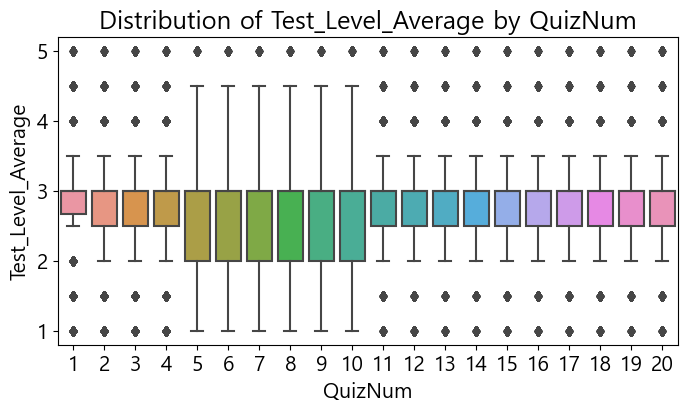

In [10]:
plt.figure(figsize=(8, 4))  # 그래프의 크기 설정
sns.boxplot(x='QuizNum', y='Test_Level_Average', data=processed_df1)
plt.title('Distribution of Test_Level_Average by QuizNum')  # 그래프 제목 설정
plt.xlabel('QuizNum')  # x축 라벨 설정
plt.ylabel('Test_Level_Average')  # y축 라벨 설정
plt.show()  # 그래프 보여주기

In [11]:
# QuizNum 같은 것끼리 묶어 결측치 채우기
processed_df1['Test_Level_Average'] = processed_df1.groupby('QuizNum')['Test_Level_Average']\
                                         .transform(lambda x: x.fillna(x.mean()))

# 결측치 평균값으로 대체
level_mean = round(processed_df1['Test_Level_Average'].mean(), 1)
processed_df1['Test_Level_Average'] = processed_df1['Test_Level_Average'].fillna(level_mean)

**QuizCode 전처리**

In [12]:
processed_df1['QuizCode'].nunique()

43987

In [13]:
# QuizCode 100개로 제한
quizcode_list = processed_df1['QuizCode'].value_counts()[:100].index.tolist()

# 100개의 QuizCode만 추출
processed_df1 = processed_df1[processed_df1['QuizCode'].isin(quizcode_list)]

**QuizYN 전처리**
- Y는 1, N는 0으로 변환

In [14]:
processed_df1['QuizYN'] = processed_df1['QuizYN'].map({'Y': 1, 'N': 0})

**Grade 전처리**
- 7은 1, 8은 2, 9는 3으로 변경

In [15]:
processed_df1['Grade'] = processed_df1['Grade'].replace({7: 1, 8: 2, 9: 3})

**Subject 전처리**
- 원핫 인코딩

In [16]:
processed_df1['Subject'].unique()

array(['MM', 'KO', 'NN', 'SS'], dtype=object)

In [17]:
processed_df1 = pd.get_dummies(processed_df1, columns=['Subject'])

In [18]:
processed_df1

,guid,Grade,Test_Jumsu,QuizNum,QuizCode,QuizYN,Test_Level_Average,Subject_KO,Subject_MM,Subject_NN,Subject_SS
50,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,10,40020402,1,1.000000,False,True,False,False
51,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,9,40021809,1,1.000000,False,True,False,False
52,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,8,40021715,1,1.000000,False,True,False,False
53,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,7,40021729,1,1.000000,False,True,False,False
54,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,6,40020877,1,1.000000,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
249888,0204ef08-10fb-4768-99c8-f45f74dae4f2,2,0,3,40084772,0,3.000000,False,True,False,False
249889,0204ef08-10fb-4768-99c8-f45f74dae4f2,2,0,1,40084770,0,3.000000,False,True,False,False
250037,2b89253c-af8b-4c4b-a60f-1a0161a6d609,2,30,1,40100326,0,3.000000,False,False,True,False
250178,5bb50dbd-db71-413a-8a99-9bbdbc7ca1c1,3,70,1,40162401,1,2.745124,False,True,False,False


In [19]:
final_df1 = processed_df1.reset_index().drop(columns={'index'})

### 1-2-3. 시각화

**Grade 비율**

In [20]:
# guid 중복 제거해서 시각화
grade_df1 = final_df1.drop_duplicates(subset=['guid'], keep='first')

grade = grade_df1['Grade'].value_counts()
grade

Grade
2    527
3    224
1     57
Name: count, dtype: int64

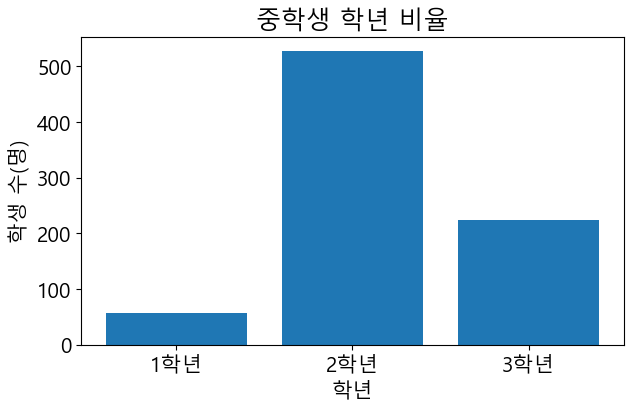

In [21]:
# 막대그래프 시각화
order_grade = [f'{i}' + '학년' for i in grade.index]
plt.figure(figsize=(7, 4))
plt.bar(x=grade.index, height=grade.values)
plt.xticks(grade.index, order_grade)
plt.title('중학생 학년 비율')
plt.xlabel('학년')
plt.ylabel('학생 수(명)')
plt.show()

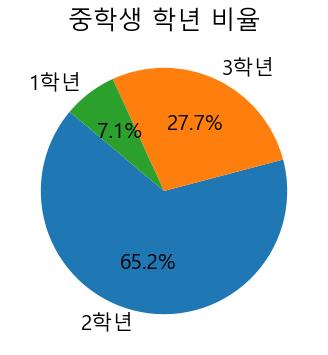

In [22]:
# 파이차트 시각화
plt.figure(figsize=(4, 4))
plt.pie(grade, labels=order_grade, autopct='%1.1f%%', startangle=140)
plt.title('중학생 학년 비율')
plt.show()

**Test_Jumsu 분포**

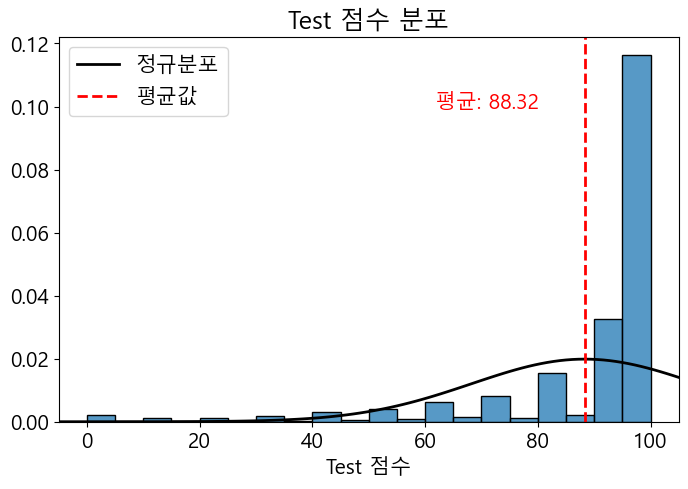

In [29]:
from scipy.stats import norm

# Test_Jumsu의 분포를 플로팅
plt.figure(figsize=(8, 5))
sns.histplot(final_df1['Test_Jumsu'], stat='density', binwidth=5)

# 정규분포 곡선 그리기
mean = final_df1['Test_Jumsu'].mean()
std = final_df1['Test_Jumsu'].std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, norm.pdf(x, mean, std), 'k', linewidth=2, label='정규분포')

# 평균값에 해당하는 선 그리기
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='평균값')

# 평균점수 표시
plt.text(mean - mean*0.3, max(p)*5, f'평균: {mean:.2f}', color = 'red')

plt.title('Test 점수 분포')
plt.xlabel('Test 점수')
plt.ylabel('')
plt.xlim([-5, 105])
plt.legend()
plt.show()

## 1-3. 데이터 활용 아이디어

- 문항별 정오답을 예측해보기 (로지스틱 회귀로 분류)


- 시험 점수를 예측해보기 (선형 회귀)


### 1-3-1. 문항별 정오답 예측하기

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
final_df1

,guid,Grade,Test_Jumsu,QuizNum,QuizCode,QuizYN,Test_Level_Average,Subject_KO,Subject_MM,Subject_NN,Subject_SS
0,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,10,40020402,1,1.000000,False,True,False,False
1,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,9,40021809,1,1.000000,False,True,False,False
2,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,8,40021715,1,1.000000,False,True,False,False
3,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,7,40021729,1,1.000000,False,True,False,False
4,447c376e-b7d0-4c53-bb8f-cc103e8065dc,1,100,6,40020877,1,1.000000,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
23146,0204ef08-10fb-4768-99c8-f45f74dae4f2,2,0,3,40084772,0,3.000000,False,True,False,False
23147,0204ef08-10fb-4768-99c8-f45f74dae4f2,2,0,1,40084770,0,3.000000,False,True,False,False
23148,2b89253c-af8b-4c4b-a60f-1a0161a6d609,2,30,1,40100326,0,3.000000,False,False,True,False
23149,5bb50dbd-db71-413a-8a99-9bbdbc7ca1c1,3,70,1,40162401,1,2.745124,False,True,False,False


In [27]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23151 entries, 0 to 23150
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   guid                23151 non-null  object 
 1   Grade               23151 non-null  int64  
 2   Test_Jumsu          23151 non-null  int64  
 3   QuizNum             23151 non-null  int64  
 4   QuizCode            23151 non-null  int64  
 5   QuizYN              23151 non-null  int64  
 6   Test_Level_Average  23151 non-null  float64
 7   Subject_KO          23151 non-null  bool   
 8   Subject_MM          23151 non-null  bool   
 9   Subject_NN          23151 non-null  bool   
 10  Subject_SS          23151 non-null  bool   
dtypes: bool(4), float64(1), int64(5), object(1)
memory usage: 1.3+ MB


**데이터 분할**

In [28]:
X = final_df1.drop(['guid', 'QuizYN'], axis=1)
y = final_df1['QuizYN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


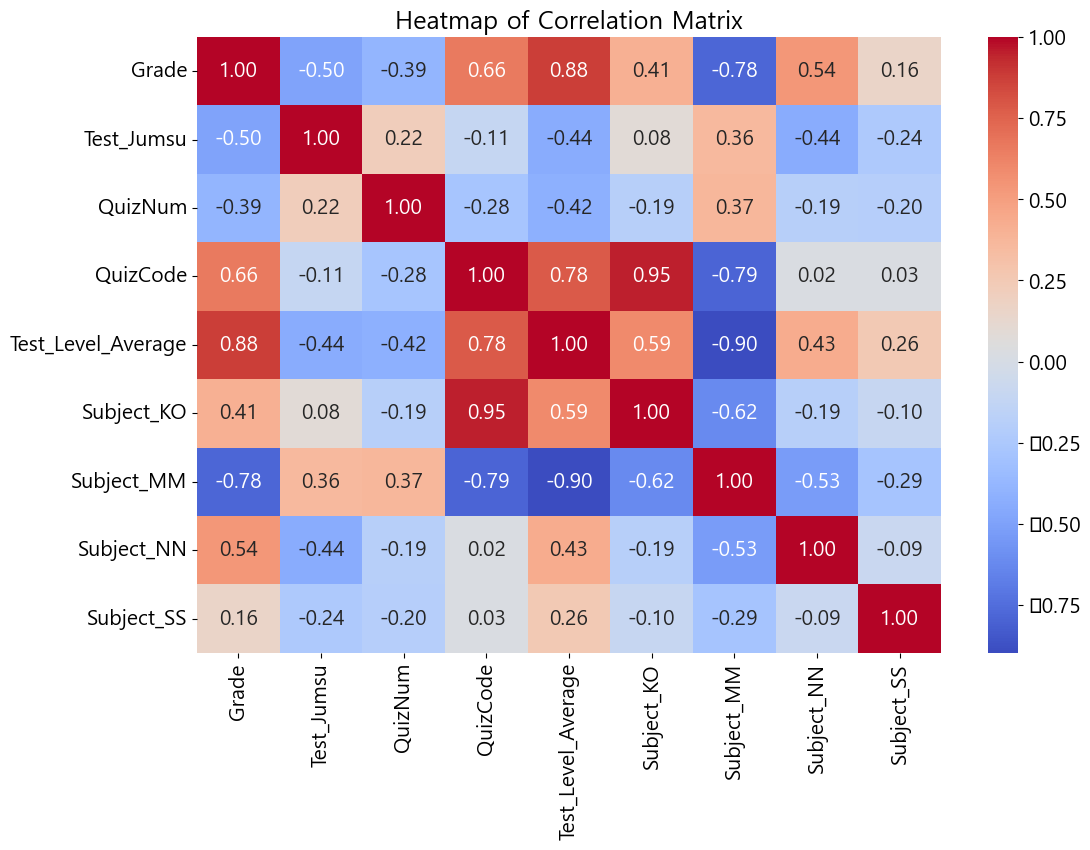

In [29]:
# 히트맵으로 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

**모델 학습(로지스틱 회귀)**

In [30]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

**모델 평가**

In [31]:
# 테스트 데이터로 예측
y_pred = lr.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.8993737853595336
[[   0  466]
 [   0 4165]]


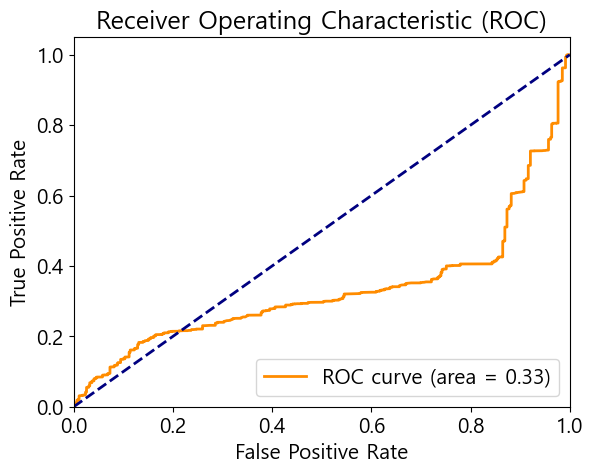

In [32]:
from sklearn.metrics import roc_curve, auc
# 예측 확률 계산
lr_probs = lr.predict_proba(X_test)[:, 1]
# ROC 곡선 생성
fpr, tpr, _ = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
# ROC 곡선 시각화
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

### 1-3-2. 시험 점수 예측하기

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**데이터 분할**

In [34]:
X = final_df1.drop(['guid', 'Test_Jumsu'], axis=1)
y = final_df1['Test_Jumsu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**모델 학습(선형 회귀)**

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**모델 평가**

In [36]:
# 테스트 데이터에 대한 예측
y_pred = lin_reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 165.9955413184544
R^2 Score: 0.5925629199511702


# 2. 월간 학습자 통계 데이터

## 2-1. 데이터 불러오기

In [30]:
dataset2 = pd.read_csv('./datasets/월간학습자통계.csv',index_col=0)
pd.set_option('display.max_columns', len(dataset2.columns))   # 중간에 생략되는 열들까지 보여주는 옵션
dataset2.head(1)

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,statusgroup_30_count,statusgroup_40_count,statusgroup_50_count,statusgroup_90_count,point_gain_activeday_count,point_gain_count,point_gain,point_loss_activeday_count,point_loss_count,point_loss,tablet_activeday_count,tablet_moved_menu_count,tablet_leave_count,tablet_resume_count,tablet_login_count,tablet_logout_count,study_activeday_count,study_count,study_notcompleted_count,study_completed_count,study_restart_count,total_system_learning_time,total_caliper_learning_time,media_activeday_count,media_count,video_action_count,video_start_count,video_restart_count,video_pause_count,video_jump_count,video_resume_count,video_speed_count,video_volume_count,video_end_count,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초등,초6,44,학습생(만료),44,0,0,0,0,0,30,0,0.0,0.0,0.0,1.0,1.0,-1246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9


## 2-2. 데이터 컬럼 설명

- userid : 회원아이디
- gender : 성별
- membertype_codename : 회원구분 코드의 한글명(학교급) ex. 초등
- grade_codename : 학년 코드
- memberstatus : 회원상태 (정회원, 준회원, 탈퇴회원 등)
- memberstatus_codename : 회원상태 코드의 한글명
- memberstatus_change : 월 중 회원상태 변화
- status_null_count : 회원상태 없음 일수
- statusgroup_10_count : 임시회원 유지한 일수
- statusgroup_20_count : 무료회원 일수
- statusgroup_30_count : 유료회원 일수
- statusgroup_40_count : 중지회원 일수
- statusgroup_50_count : 만료회원 일수
- statusgroup_90_count : 해지회원 일수
- point_gain_activeday_count : 포인트 획득일수
- point_gain_count : 포인트 획득 횟수
- point_gain : 획득 포인트
- point_loss_activeday_count : 포인트 차감일수
- point_loss_count : 포인트 차감 횟수
- point_loss : 차감 포인트
- tablet_activeday_count : 기기 활성 횟수
- tablet_moved_menu_count : 기기 메뉴이동 횟수
- tablet_leave_count :기기 물리적 종료 횟수
- tablet_resume_count : 기기 물리적 재개 횟수
- tablet_login_count : 로그인 횟수
- tablet_logout_count : 기기 로그아웃 횟수
- study_activeday_count :학습 활성일 횟수
- study_count : 학습 횟수
- study_notcompleted_count : 학습 미완료 횟수
- study_completed_count : 학습 완료 횟수
- study_restart_count : 학습 재시작 횟수
- total_system_learning_time : 학습 시간합계(시스템)
- total_caliper_learning_time : 학습 시간합계(캘리퍼)
- media_activeday_count : 미디어 활동 활성 일수
- media_count : 미디어 학습 횟수
- video_action_count : 비디오 활동 횟수
- video_start_count : 비디오 시작 횟수
- video_restart_count : 비디오 재시작 횟수
- video_pause_count : 비디오 일시정지 횟수
- video_jump_count : 비디오 점프 횟수
- video_resume_count : 비디오 재개(일시정지 후 횟수)
- video_speed_count : 비디오 속도 조절 횟수
- video_volume_count : 비디오 볼륨 조절 횟수
- video_end_count : 비디오 종료 횟수
- test_activeday_count : 평가 활성 일수
- test_count : 평가 횟수
- test_average_score : 평가 평균 점수
- test_item_count : 평가 문항 개수
- test_correct_count : 평가 정답 개수
- wrong_count : 오답 노트 진입 횟수
- wrong_item_count : 오답 노트 문항 개수
- wrong_correct_count : 오답 노트 정답 개수
- yyyy : 년
- mm : 월

In [31]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211851 entries, 0 to 211850
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   userid                       211851 non-null  object 
 1   gender                       211851 non-null  object 
 2   membertype_codename          211851 non-null  object 
 3   grade_codename               211851 non-null  object 
 4   memberstatus                 211851 non-null  int64  
 5   memberstatus_codename        211851 non-null  object 
 6   memberstatus_change          211851 non-null  object 
 7   status_null_count            211851 non-null  int64  
 8   statusgroup_10_count         211851 non-null  int64  
 9   statusgroup_20_count         211851 non-null  int64  
 10  statusgroup_30_count         211851 non-null  int64  
 11  statusgroup_40_count         211851 non-null  int64  
 12  statusgroup_50_count         211851 non-null  int64  
 13  stat

In [32]:
# 결측치 개수와 비율 확인
null_cnt_df = pd.DataFrame(dataset2.isnull().sum()).rename(columns={0:'결측치 개수'}).reset_index()
null_cnt_df['결측치 비율'] = round(null_cnt_df['결측치 개수']/len(dataset2)*100, 2)
null_cnt_df

,index,결측치 개수,결측치 비율
0,userid,0,0.00
1,gender,0,0.00
2,membertype_codename,0,0.00
3,grade_codename,0,0.00
4,memberstatus,0,0.00
5,memberstatus_codename,0,0.00
6,memberstatus_change,0,0.00
7,status_null_count,0,0.00
8,statusgroup_10_count,0,0.00
9,statusgroup_20_count,0,0.00


### 2-2-1. 변수 선택

**변수 선택**  
- userid : 회원아이디
- gender : 성별
- grade_codename : 학년 코드
- memberstatus_codename : 회원상태(정회원, 준회원, 탈퇴회원 등) 코드의 한글명
- statusgroup_20_count : 무료회원 유지기간
- statusgroup_30_count : 유료회원 유지기간
- statusgroup_40_count : 중지회원 유지기간
- statusgroup_50_count : 만료회원 유지기간
- point_gain_count : 포인트 획득 횟수
- point_loss_count : 포인트 차감 횟수
- study_count : 학습 횟수
- total_system_learning_time : 학습 시간합계(시스템)
- test_count : 평가 횟수
- test_average_score : 평가 평균 점수
- wrong_count : 오답 노트 진입 횟수

In [33]:
processed_df2 = dataset2[['userid', 'gender', 'grade_codename', 'memberstatus_codename', 
                          'statusgroup_20_count', 'statusgroup_30_count', 
                          'statusgroup_40_count', 'statusgroup_50_count',
                          'point_gain_count', 'point_loss_count', 'study_count', 
                          'total_system_learning_time', 
                          'test_count', 'test_average_score', 'wrong_count']]

In [34]:
processed_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211851 entries, 0 to 211850
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   userid                      211851 non-null  object 
 1   gender                      211851 non-null  object 
 2   grade_codename              211851 non-null  object 
 3   memberstatus_codename       211851 non-null  object 
 4   statusgroup_20_count        211851 non-null  int64  
 5   statusgroup_30_count        211851 non-null  int64  
 6   statusgroup_40_count        211851 non-null  int64  
 7   statusgroup_50_count        211851 non-null  int64  
 8   point_gain_count            207643 non-null  float64
 9   point_loss_count            207643 non-null  float64
 10  study_count                 132794 non-null  float64
 11  total_system_learning_time  131529 non-null  float64
 12  test_count                  126914 non-null  float64
 13  test_average_score 

In [35]:
# 결측치 개수와 비율 확인
null_cnt_df = pd.DataFrame(processed_df2.isnull().sum()).rename(columns={0:'결측치 개수'}).reset_index()
null_cnt_df['결측치 비율'] = round(null_cnt_df['결측치 개수']/len(processed_df2)*100, 2)
null_cnt_df

,index,결측치 개수,결측치 비율
0,userid,0,0.00
1,gender,0,0.00
2,grade_codename,0,0.00
3,memberstatus_codename,0,0.00
4,statusgroup_20_count,0,0.00
5,statusgroup_30_count,0,0.00
6,statusgroup_40_count,0,0.00
7,statusgroup_50_count,0,0.00
8,point_gain_count,4208,1.99
9,point_loss_count,4208,1.99


### 2-2-2. 전처리

In [38]:
processed_df2.head(5)

,userid,gender,grade_codename,memberstatus_codename,statusgroup_20_count,statusgroup_30_count,statusgroup_40_count,statusgroup_50_count,point_gain_count,point_loss_count,study_count,total_system_learning_time,test_count,test_average_score,wrong_count
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초6,학습생(만료),0,0,0,30,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초6,학습생(만료),0,0,0,30,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초2,학습생(만료),2,0,0,28,2.0,0.0,NaN,NaN,NaN,NaN,NaN
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,F,초3,학습생(만료),0,0,0,30,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,M,초5,학습생(만료),15,0,0,12,18.0,0.0,2.0,694.0,1.0,100.0,NaN


#### 범주형 변수

**gender**  
- X 제거

In [39]:
gender2 = processed_df2['gender'].value_counts()
gender2

gender
M    116808
F     90453
X      4590
Name: count, dtype: int64

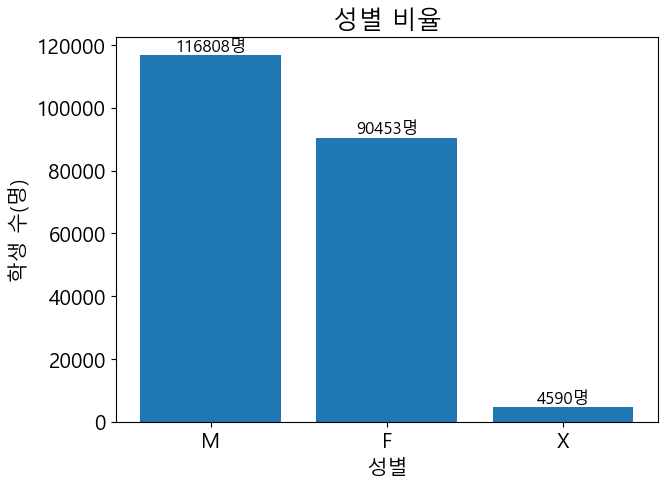

In [40]:
# 막대그래프 시각화
order_gender = [i for i in gender2.index]
plt.figure(figsize=(7, 5))
bars = plt.bar(x=gender2.index, height=gender2.values)

# 막대그래프 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}명', ha='center', va='bottom', fontsize=12)
    
plt.xticks(gender2.index, order_gender)
plt.title('성별 비율')
plt.xlabel('성별')
plt.ylabel('학생 수(명)')
plt.show()

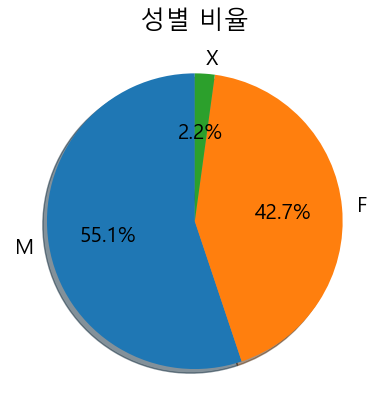

In [41]:
explode = (0, 0, 0)
labels = gender2.index
values = gender2.values

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# ax1.axis('equal')  

plt.title('성별 비율')
plt.show()

C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\4187093089.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['남', '여', 'X'])


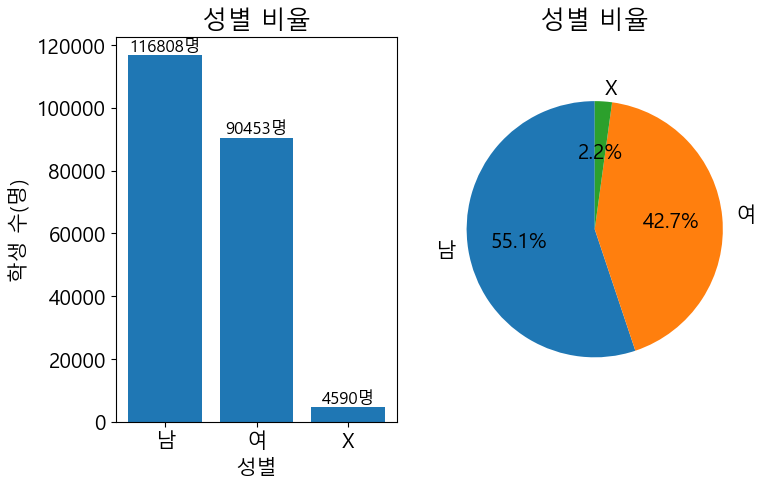

In [42]:
# 막대그래프와 파이차트 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
plt.title('성별 비율')
plt.xlabel('성별')
plt.ylabel('학생 수(명)')

# 막대그래프
bars = ax1.bar(gender2.index, gender2.values)

for bar in bars:    # 막대그래프 위에 숫자 표시
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}명', ha='center', va='bottom', fontsize=12)
    
ax1.set_title('성별 비율')
ax1.set_xlabel('성별')
ax1.set_ylabel('학생 수(명)')
ax1.set_xticklabels(['남', '여', 'X'])

# 파이차트
ax2.pie(gender2.values, labels=['남', '여', 'X'], autopct='%1.1f%%', startangle=90)
ax2.set_title('성별 비율')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.axis('equal')   # 파이 차트가 원형으로 보이도록 설정

plt.show()

C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\1100474312.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['남', '여'])


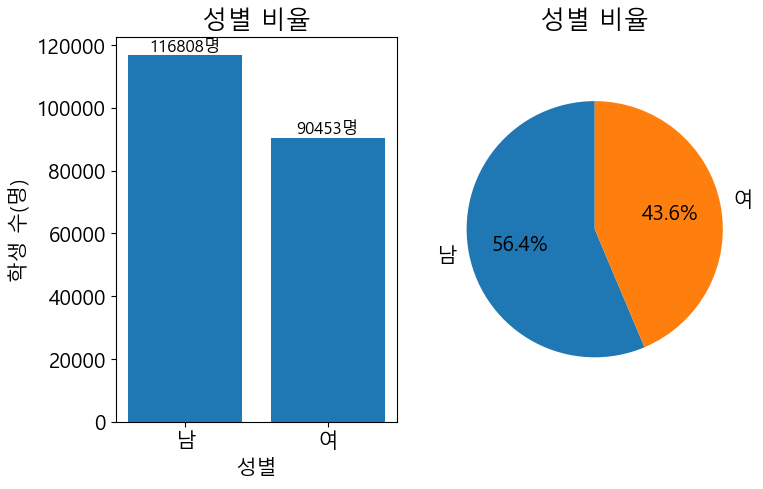

In [43]:
# X 제거
processed_df2 = processed_df2[processed_df2['gender'] != 'X']

# 다시 시각화
gender2_new = processed_df2['gender'].value_counts()

# 막대그래프와 파이차트 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
plt.title('성별 비율')
plt.xlabel('성별')
plt.ylabel('학생 수(명)')

# 막대그래프
bars = ax1.bar(gender2_new.index, gender2_new.values)

for bar in bars:    # 막대그래프 위에 숫자 표시
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}명', ha='center', va='bottom', fontsize=12)
    
ax1.set_title('성별 비율')
ax1.set_xlabel('성별')
ax1.set_ylabel('학생 수(명)')
ax1.set_xticklabels(['남', '여'])

# 파이차트
ax2.pie(gender2_new.values, labels=['남', '여'], autopct='%1.1f%%', startangle=90)
ax2.set_title('성별 비율')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.axis('equal')   # 파이 차트가 원형으로 보이도록 설정

plt.show()

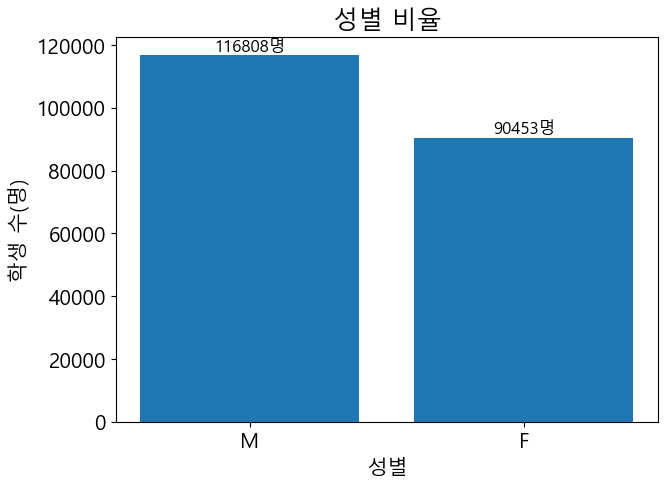

In [44]:
# 막대그래프 시각화
order_gender = [i for i in gender2_new.index]
plt.figure(figsize=(7, 5))
bars = plt.bar(x=gender2_new.index, height=gender2_new.values)

# 막대그래프 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}명', ha='center', va='bottom', fontsize=12)
    
plt.xticks(gender2_new.index, order_gender)
plt.title('성별 비율')
plt.xlabel('성별')
plt.ylabel('학생 수(명)')
plt.show()

**grade_codename**
- 초1 ~ 초6 까지만 선택

In [45]:
grade_list = processed_df2['grade_codename'].unique()
grade_list

array(['초6', '초2', '초3', '초5', '키즈', '초1', '초4', '중1', '중2', '중3', '고1',
       '고3', '기타', '고2'], dtype=object)

In [46]:
grade_list = [f'초{i}' for i in range(1, 7)]

processed_df2 = processed_df2[processed_df2['grade_codename'].isin(grade_list)]
processed_df2

,userid,gender,grade_codename,memberstatus_codename,statusgroup_20_count,statusgroup_30_count,statusgroup_40_count,statusgroup_50_count,point_gain_count,point_loss_count,study_count,total_system_learning_time,test_count,test_average_score,wrong_count
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초6,학습생(만료),0,0,0,30,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초6,학습생(만료),0,0,0,30,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초2,학습생(만료),2,0,0,28,2.0,0.0,NaN,NaN,NaN,NaN,NaN
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,F,초3,학습생(만료),0,0,0,30,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,M,초5,학습생(만료),15,0,0,12,18.0,0.0,2.0,694.0,1.0,100.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211846,897aecf4-f213-48d3-9ee9-bbf7a3015313,F,초3,학습생(정),0,30,0,0,66.0,0.0,55.0,20749.0,24.0,74.08,NaN
211847,89949613-340b-4d8d-9a16-450d35f95e25,F,초3,학습생(정),0,30,0,0,111.0,0.0,76.0,30970.0,52.0,66.69,NaN
211848,899b9567-69b2-484c-87a8-368bb31ed469,M,초1,학습생(정),0,30,0,0,189.0,0.0,110.0,52420.0,54.0,83.78,NaN
211849,89bb2f78-b0da-4cfa-9e8c-793656ad2c63,M,초5,학습생(정),0,30,0,0,147.0,0.0,55.0,26551.0,37.0,82.84,18.0


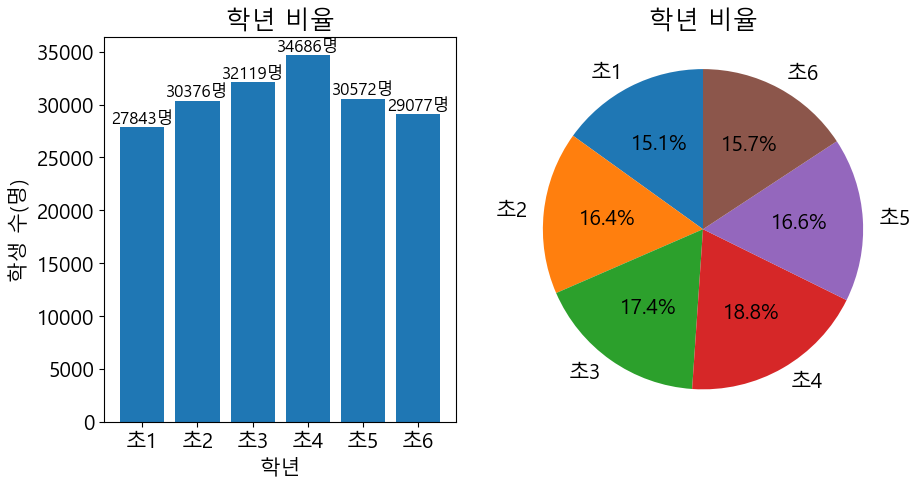

In [47]:
grade = processed_df2['grade_codename'].value_counts().reindex(grade_list)

# 막대그래프와 파이차트 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.title('학년 비율')
plt.xlabel('학년')
plt.ylabel('학생 수(명)')

# 막대그래프
bars = ax1.bar(grade.index, grade.values)

for bar in bars:    # 막대그래프 위에 숫자 표시
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}명', ha='center', va='bottom', fontsize=12)
    
ax1.set_title('학년 비율')
ax1.set_xlabel('학년')
ax1.set_ylabel('학생 수(명)')

# 파이차트
ax2.pie(grade.values, labels=grade.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('학년 비율')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.axis('equal')  # 파이 차트가 원형으로 보이도록 설정

plt.show()

**memberstatus_codename**
- 데이터 값 변경
>- 학습생(만료) : 만료회원
>- 학습생(미납_중지) : 회원
>- 학습생(탈퇴) : 제거 (탈퇴회원이 1명이므로)
>- 학습생(정) : 회원

In [48]:
processed_df2['memberstatus_codename'].unique()

array(['학습생(만료)', '학습생(미납_중지)', '학습생(탈퇴)', '학습생(정)'], dtype=object)

In [49]:
processed_df2['memberstatus_codename'].value_counts()

memberstatus_codename
학습생(정)        94577
학습생(만료)       89104
학습생(미납_중지)      991
학습생(탈퇴)           1
Name: count, dtype: int64

In [50]:
# '학습생(탈퇴)'가 아닌 데이터만 남기기
processed_df2 = processed_df2[processed_df2['memberstatus_codename'] != '학습생(탈퇴)']

In [51]:
status_mapping = {
    '학습생(만료)': '만료회원',
    '학습생(미납_중지)': '회원',
    '학습생(정)': '회원'
}

processed_df2['memberstatus_codename'] = processed_df2['memberstatus_codename'].replace(status_mapping)

C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\905047091.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df2['memberstatus_codename'] = processed_df2['memberstatus_codename'].replace(status_mapping)


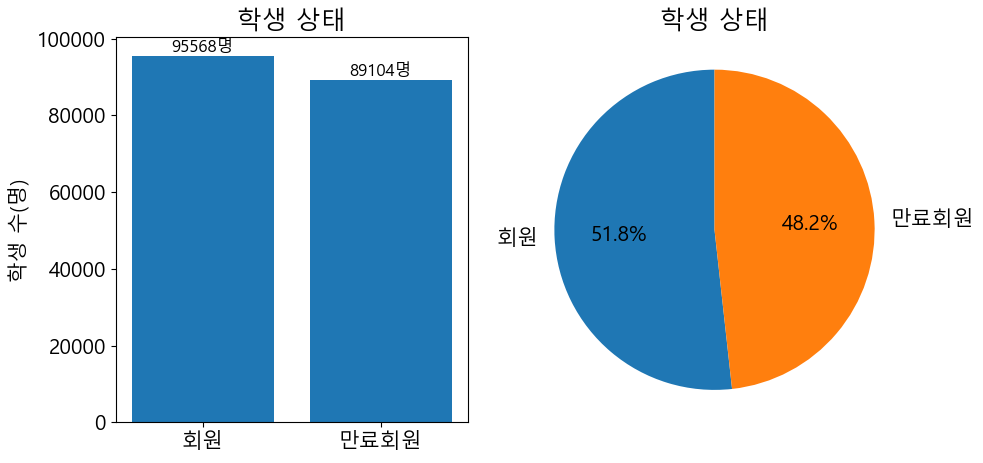

In [52]:
order_memberstatus = ['회원', '만료회원']
memberstatus = processed_df2['memberstatus_codename'].value_counts().reindex(order_memberstatus)

# 막대그래프와 파이차트 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.title('학생 상태')
plt.xlabel('')
plt.ylabel('학생 수(명)')

# 막대그래프
bars = ax1.bar(memberstatus.index, memberstatus.values)

for bar in bars:    # 막대그래프 위에 숫자 표시
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}명', ha='center', va='bottom', fontsize=12)
    
ax1.set_title('학생 상태')
ax1.set_xlabel('')
ax1.set_ylabel('학생 수(명)')

# 파이차트
ax2.pie(memberstatus.values, labels=memberstatus.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('학생 상태')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.axis('equal')  # 파이 차트가 원형으로 보이도록 설정

plt.show()

#### 수치형 변수

In [53]:
# 수치형 변수 파악 1
processed_df2.iloc[:, 4:].describe()

,statusgroup_20_count,statusgroup_30_count,statusgroup_40_count,statusgroup_50_count,point_gain_count,point_loss_count,study_count,total_system_learning_time,test_count,test_average_score,wrong_count
count,184672.00000,184672.000000,184672.000000,184672.000000,181247.000000,181247.000000,116910.000000,1.160690e+05,113041.000000,113041.000000,70388.000000
mean,1.28203,13.042383,0.101824,11.856968,65.882387,1.379736,58.425276,3.507081e+04,34.013438,75.699510,11.127579
std,4.00520,12.796441,1.496530,13.887475,73.808904,3.502067,43.234819,6.650666e+04,23.935977,15.655197,9.883686
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.300000e+01,1.000000,0.000000,1.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,8.265000e+03,15.000000,67.770000,3.000000
50%,0.00000,12.000000,0.000000,0.000000,39.000000,1.000000,55.000000,1.889700e+04,33.000000,79.080000,9.000000
75%,0.00000,26.000000,0.000000,30.000000,119.000000,1.000000,80.000000,3.368900e+04,48.000000,86.810000,16.000000
max,30.00000,31.000000,31.000000,31.000000,1519.000000,163.000000,1531.000000,2.951929e+06,1174.000000,100.000000,218.000000


In [54]:
# 수치형 변수 파악
processed_df2.iloc[:, 4:].corr()

,statusgroup_20_count,statusgroup_30_count,statusgroup_40_count,statusgroup_50_count,point_gain_count,point_loss_count,study_count,total_system_learning_time,test_count,test_average_score,wrong_count
statusgroup_20_count,1.000000,-0.316656,-0.021779,-0.016855,-0.126106,-0.051381,-0.298290,-0.120365,-0.352621,0.139073,-0.201645
statusgroup_30_count,-0.316656,1.000000,-0.033334,-0.813934,0.753178,0.170750,0.486935,0.150728,0.515949,-0.052166,0.240700
statusgroup_40_count,-0.021779,-0.033334,1.000000,-0.050051,-0.046765,-0.012676,-0.050545,-0.013987,-0.049389,-0.032943,-0.016622
statusgroup_50_count,-0.016855,-0.813934,-0.050051,1.000000,-0.695594,-0.108763,-0.383735,-0.131411,-0.411510,0.087375,-0.218131
point_gain_count,-0.126106,0.753178,-0.046765,-0.695594,1.000000,0.245752,0.877110,0.170029,0.841618,0.150970,0.450338
point_loss_count,-0.051381,0.170750,-0.012676,-0.108763,0.245752,1.000000,0.254524,0.018453,0.175634,0.029378,0.010333
study_count,-0.298290,0.486935,-0.050545,-0.383735,0.877110,0.254524,1.000000,0.184040,0.793663,0.077528,0.338420
total_system_learning_time,-0.120365,0.150728,-0.013987,-0.131411,0.170029,0.018453,0.184040,1.000000,0.153126,0.029393,0.062105
test_count,-0.352621,0.515949,-0.049389,-0.411510,0.841618,0.175634,0.793663,0.153126,1.000000,0.028915,0.458019
test_average_score,0.139073,-0.052166,-0.032943,0.087375,0.150970,0.029378,0.077528,0.029393,0.028915,1.000000,-0.117678


**statusgroup_20_count**  
- '무료회원_유지기간'으로 컬럼명 변경  

**statusgroup_30_count**
- '유료회원_유지기간'으로 컬럼명 변경

**statusgroup_40_count**
- '중지회원_유지기간'으로 컬럼명 변경

**statusgroup_50_count**
- '만료회원_유지기간'으로 컬럼명 변경

In [55]:
processed_df2.rename(columns={'statusgroup_20_count': '무료회원_유지기간', 
                              'statusgroup_30_count': '유료회원_유지기간', 
                              'statusgroup_40_count': '중지회원_유지기간', 
                              'statusgroup_50_count': '만료회원_유지기간'}, inplace=True)

C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\797460183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df2.rename(columns={'statusgroup_20_count': '무료회원_유지기간',


In [56]:
무료회원_유지기간 = processed_df2['무료회원_유지기간'].value_counts().sort_index()
유료회원_유지기간 = processed_df2['유료회원_유지기간'].value_counts().sort_index()
중지회원_유지기간 = processed_df2['중지회원_유지기간'].value_counts().sort_index()
만료회원_유지기간 = processed_df2['만료회원_유지기간'].value_counts().sort_index()

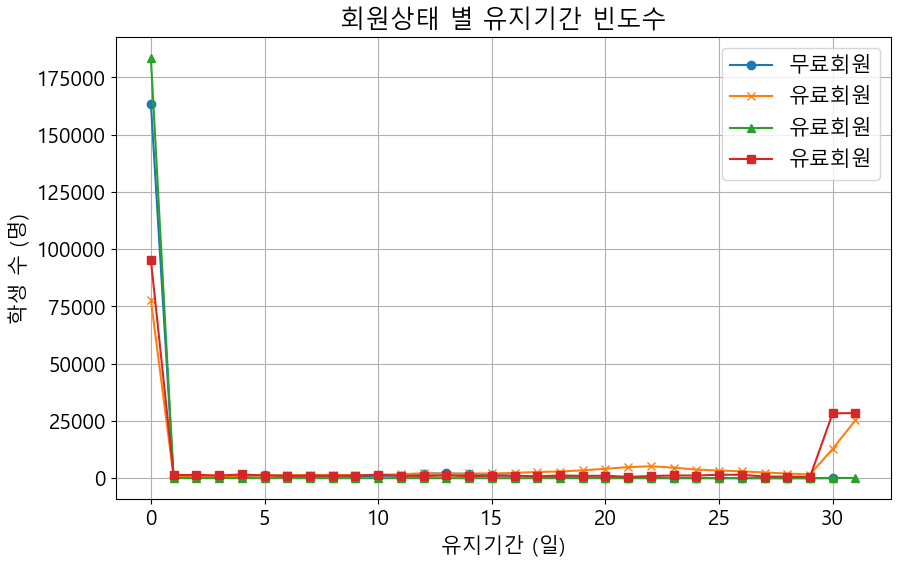

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(무료회원_유지기간.index, 무료회원_유지기간.values, marker='o', label='무료회원')
plt.plot(유료회원_유지기간.index, 유료회원_유지기간.values, marker='x', label='유료회원')
plt.plot(중지회원_유지기간.index, 중지회원_유지기간.values, marker='^', label='유료회원')
plt.plot(만료회원_유지기간.index, 만료회원_유지기간.values, marker='s', label='유료회원')

plt.legend()
plt.title('회원상태 별 유지기간 빈도수')
plt.xlabel('유지기간 (일)')
plt.ylabel('학생 수 (명)')
plt.grid(True)
plt.show()

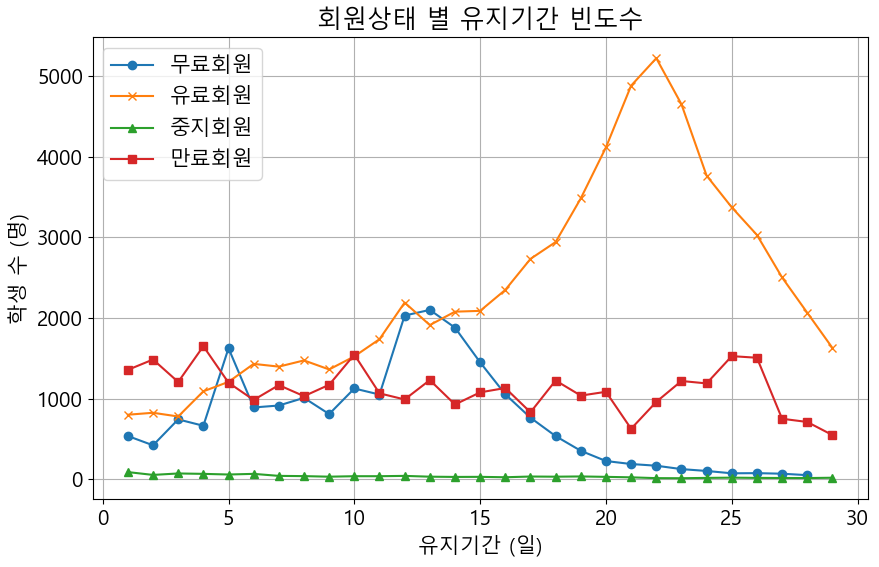

In [58]:
# 유지기간이 0일, 30일인 것 제외하고 시각화
plt.figure(figsize=(10, 6))
plt.plot(무료회원_유지기간.index[1:-2], 무료회원_유지기간.values[1:-2], marker='o', label='무료회원')
plt.plot(유료회원_유지기간.index[1:-2], 유료회원_유지기간.values[1:-2], marker='x', label='유료회원')
plt.plot(중지회원_유지기간.index[1:-2], 중지회원_유지기간.values[1:-2], marker='^', label='중지회원')
plt.plot(만료회원_유지기간.index[1:-2], 만료회원_유지기간.values[1:-2], marker='s', label='만료회원')

plt.legend()
plt.title('회원상태 별 유지기간 빈도수')
plt.xlabel('유지기간 (일)')
plt.ylabel('학생 수 (명)')
plt.grid(True)
plt.show()

**point_gain_count**
- 결측치 0으로 채우기
- 0점, 1점, 10점이하, 100점이하, 100점초과로 분류

**point_loss_count**
- 결측치 0으로 채우기
- 0점, 1점, 10점이하, 100점이하, 100점초과로 분류

In [59]:
# 결측치 0으로 채우기
processed_df2['point_gain_count'] = processed_df2['point_gain_count'].fillna(0)
processed_df2['point_loss_count'] = processed_df2['point_loss_count'].fillna(0)

C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\853498562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df2['point_gain_count'] = processed_df2['point_gain_count'].fillna(0)
C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\853498562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df2['point_loss_count'] = processed_df2['point_loss_count'].fillna(0)


In [60]:
processed_df2['point_gain_count'].value_counts()

point_gain_count
0.0      58011
1.0       6764
2.0       2684
3.0       1789
4.0       1452
         ...  
477.0        1
418.0        1
563.0        1
449.0        1
396.0        1
Name: count, Length: 509, dtype: int64

In [61]:
processed_df2[['point_gain_count', 'point_loss_count']].describe()

,point_gain_count,point_loss_count
count,184672.000000,184672.000000
mean,64.660506,1.354147
std,73.659524,3.474429
min,0.000000,0.000000
25%,0.000000,0.000000
50%,36.000000,1.000000
75%,118.000000,1.000000
max,1519.000000,163.000000


In [62]:
def categorize_points(points):
    if points == 0.0:
        return '0점'
    elif points == 1.0:
        return '1점'
    elif points <= 10.0:
        return '10점 이하'
    elif points <= 100.0:
        return '100점 이하'
    else:
        return '100점 초과'

In [63]:
# 범주화 적용
processed_df2['point_gain_group'] = processed_df2['point_gain_count'].apply(categorize_points)
processed_df2['point_loss_group'] = processed_df2['point_loss_count'].apply(categorize_points)

C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\2296730737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df2['point_gain_group'] = processed_df2['point_gain_count'].apply(categorize_points)
C:\Users\BIG3-012\AppData\Local\Temp\ipykernel_1420\2296730737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df2['point_loss_group'] = processed_df2['point_loss_count'].apply(categorize_points)


In [64]:
order_points = ['0점', '1점', '10점 이하', '100점 이하', '100점 초과']
point_gain_group = processed_df2['point_gain_group'].value_counts().reindex(order_points)
point_loss_group = processed_df2['point_loss_group'].value_counts().reindex(order_points)
point_gain_group, point_loss_group

(point_gain_group
 0점         58011
 1점          6764
 10점 이하     11460
 100점 이하    51324
 100점 초과    57113
 Name: count, dtype: int64,
 point_loss_group
 0점         78181
 1점         77854
 10점 이하     24856
 100점 이하     3770
 100점 초과       11
 Name: count, dtype: int64)

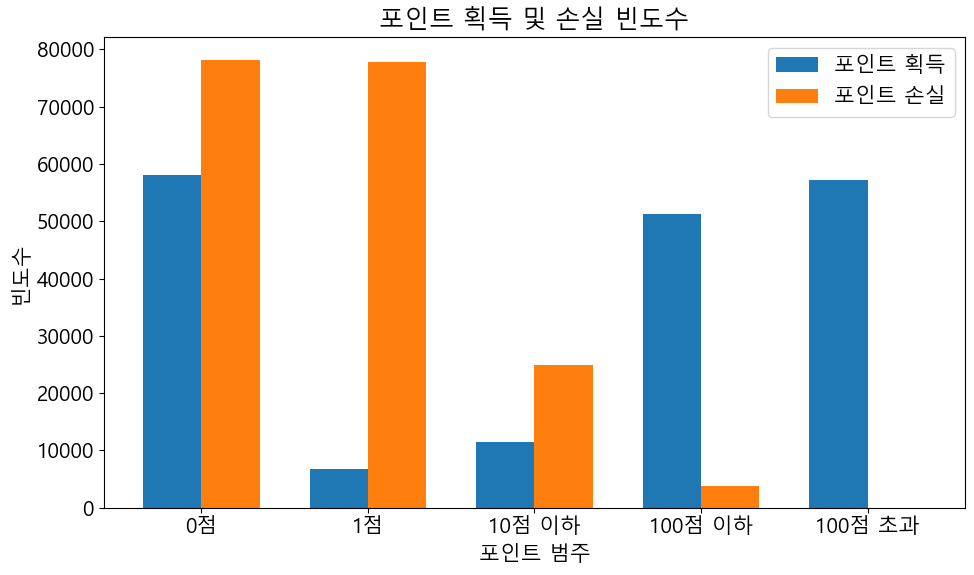

In [65]:
index = np.arange(len(order_points))

# 막대그래프의 너비
bar_width = 0.35

# 막대그래프 생성
fig, ax = plt.subplots(figsize=(10, 6))
gain_bars = ax.bar(index, point_gain_group.values, bar_width, label='포인트 획득')
loss_bars = ax.bar(index + bar_width, point_loss_group.values, bar_width, label='포인트 손실')

# 막대그래프에 레이블, 제목, 범례 추가
ax.set_xlabel('포인트 범주')
ax.set_ylabel('빈도수')
ax.set_title('포인트 획득 및 손실 빈도수')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(order_points)
ax.legend()

# 화면에 표시
plt.tight_layout()
plt.show()

In [66]:
processed_df2 = processed_df2.drop(columns={'point_gain_group', 'point_loss_group'})

**study_count**
- 'point_gain_count'와의 상관계수가 0.877424로 매우 강한 선형 관계를 나타낸다.
- 선형회귀를 학습하여 예측한 값으로 결측치를 채운다.

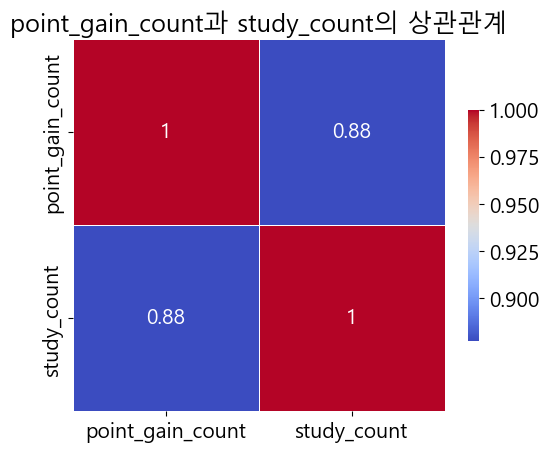

In [67]:
corr = processed_df2[['point_gain_count', 'study_count']].corr()

# 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('point_gain_count과 study_count의 상관관계')
plt.show()

In [68]:
from sklearn.linear_model import LinearRegression

# 1. 데이터 준비
# 결측치가 없는 행만 선택
data_no_missing = processed_df2.dropna(subset=['study_count', 'point_gain_count'])

X = data_no_missing[['point_gain_count']]
y = data_no_missing['study_count']

# 2. 모델 학습
model = LinearRegression()
model.fit(X, y)

# 3. 결측치가 있는 행을 선택하고 'point_gain_count'를 기반으로 'study_count'를 예측
missing_rows = processed_df2[processed_df2['study_count'].isnull()]
predicted_values = model.predict(missing_rows[['point_gain_count']])

# 4. 결측치 채우기
processed_df2.loc[processed_df2['study_count'].isnull(), 'study_count'] = predicted_values


**total_system_learning_time**
- 음수인 것은 제거 후
- 사분위수를 확인해서( IQR(Interquartile Range)을 사용)
- Q3와 IQR을 계산해서 UPPER_BOUND 이상치 범위를 설정해서
- 25%값으로 대체
- 이후 결측치도 25%값으로 대체한다.

In [69]:
processed_df2['total_system_learning_time'].value_counts().sort_index()

total_system_learning_time
-53.0         1
-40.0         1
-38.0         1
-32.0         2
-30.0         1
             ..
 1589540.0    1
 1655286.0    1
 2087991.0    1
 2673183.0    1
 2951929.0    1
Name: count, Length: 54757, dtype: int64

<Axes: xlabel='total_system_learning_time'>

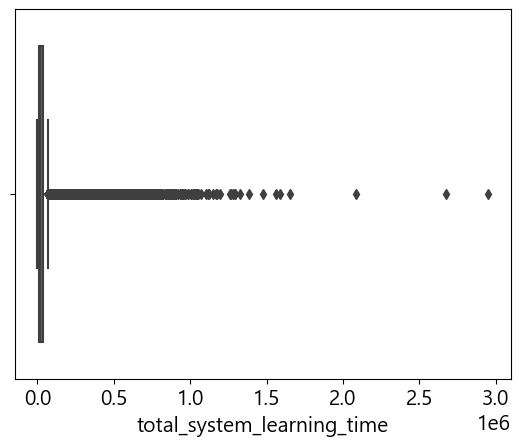

In [70]:
sns.boxplot(data=processed_df2, x='total_system_learning_time')

In [71]:
# 'total_system_learning_time'이 0 미만이면서 NaN이 아닌 행만 제거
processed_df2 = processed_df2[(processed_df2['total_system_learning_time'] >= 0) | 
                              (processed_df2['total_system_learning_time'].isnull())]


In [72]:
processed_df2['total_system_learning_time'].value_counts().sort_index()

total_system_learning_time
0.0          194
1.0           14
2.0           14
3.0           30
4.0           36
            ... 
1589540.0      1
1655286.0      1
2087991.0      1
2673183.0      1
2951929.0      1
Name: count, Length: 54730, dtype: int64

In [73]:
processed_df2['total_system_learning_time'].describe()

count    1.155310e+05
mean     3.523414e+04
std      6.661815e+04
min      0.000000e+00
25%      8.404000e+03
50%      1.898500e+04
75%      3.381450e+04
max      2.951929e+06
Name: total_system_learning_time, dtype: float64

In [74]:
# 1. Q1과 Q3 계산
Q1 = processed_df2['total_system_learning_time'].quantile(0.25)
Q3 = processed_df2['total_system_learning_time'].quantile(0.75)
IQR = Q3 - Q1

# 2. 이상치 범위 설정
upper_bound = Q3 + 1.5 * IQR

# 3. 이상치를 중앙값으로 대체
processed_df2.loc[(processed_df2['total_system_learning_time'] > upper_bound), 'total_system_learning_time'] = Q1

In [75]:
# 결측치 처리
quantile_25 = processed_df2['total_system_learning_time'].quantile(0.25)
processed_df2.loc[(processed_df2['total_system_learning_time'].isnull()), 'total_system_learning_time'] = quantile_25

<Axes: xlabel='total_system_learning_time'>

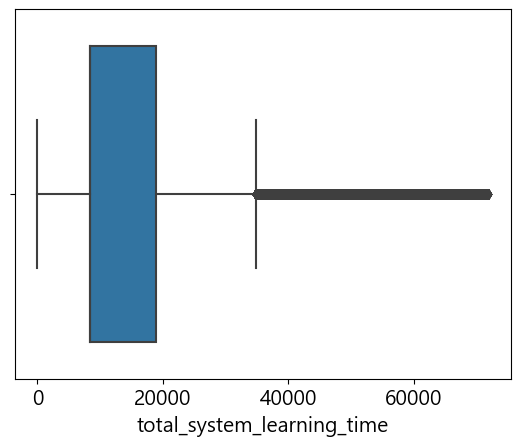

In [76]:
sns.boxplot(data=processed_df2, x='total_system_learning_time')

**test_count**
- 'point_gain_count'와의 상관계수가 0.841618로 매우 강한 선형 관계를 나타낸다.
- 선형회귀를 학습하여 예측한 값으로 결측치를 채운다.

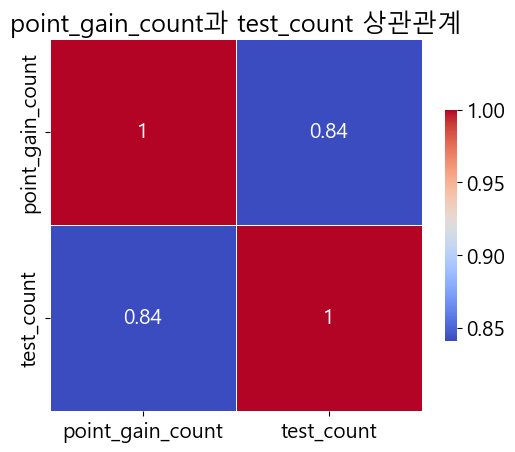

In [77]:
corr = processed_df2[['point_gain_count', 'test_count']].corr()

# 히트맵 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('point_gain_count과 test_count 상관관계')
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression

# 1. 데이터 준비
# 결측치가 없는 행만 선택
data_no_missing = processed_df2.dropna(subset=['test_count', 'point_gain_count'])

X = data_no_missing[['point_gain_count']]
y = data_no_missing['test_count']

# 2. 모델 학습
model = LinearRegression()
model.fit(X, y)

# 3. 결측치가 있는 행을 선택하고 'point_gain_count'를 기반으로 'test_count'를 예측
missing_rows = processed_df2[processed_df2['test_count'].isnull()]
predicted_values = model.predict(missing_rows[['point_gain_count']])

# 4. 결측치 채우기
processed_df2.loc[processed_df2['test_count'].isnull(), 'test_count'] = predicted_values


**test_average_score**
- 결측치를 정규분포를 따르는 난수로 채우기

In [79]:
processed_df2['test_average_score'].value_counts().sort_index()

test_average_score
0.00       201
1.25         1
3.30         1
3.33         1
4.00         1
          ... 
99.54        1
99.55        1
99.68        1
99.83        1
100.00    2766
Name: count, Length: 7198, dtype: int64

In [80]:
processed_df2['test_average_score'].describe()

count    112733.000000
mean         75.682901
std          15.633985
min           0.000000
25%          67.760000
50%          79.070000
75%          86.790000
max         100.000000
Name: test_average_score, dtype: float64

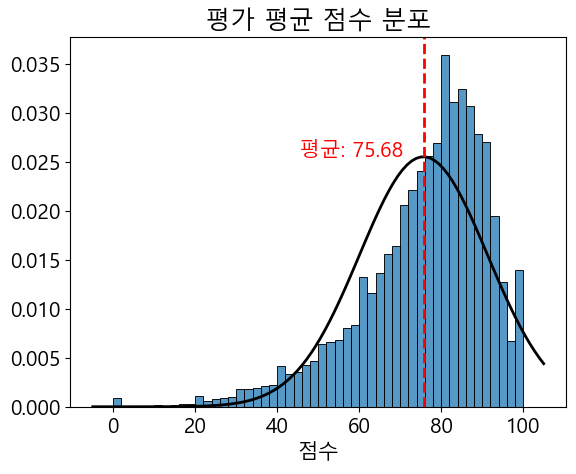

In [81]:
from scipy.stats import norm

# 데이터셋에서 평균과 표준편차 계산
mean = processed_df2['test_average_score'].mean()
std = processed_df2['test_average_score'].std()

# 히스토그램 그리기
sns.histplot(processed_df2['test_average_score'], kde=False, stat='density', bins=50)

# 정규분포 곡선 그리기
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

# 평균값에 선 그리기
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)

# 평균점수 표시
plt.text(mean - mean*0.4, max(p), f'평균: {mean:.2f}', color = 'red')

# 그래프 제목과 축 레이블 설정
plt.title('평가 평균 점수 분포')
plt.xlabel('점수')
plt.ylabel('')

# 그래프 표시
plt.show()

In [82]:
mean = processed_df2['test_average_score'].mean()
std = processed_df2['test_average_score'].std()

# 난수 생성 시 최소값과 최대값 설정
min_val = 0
max_val = 100

# np.random.normal을 사용하여 결측치 수만큼 난수 생성
missing_values = np.random.normal(mean, std, size=processed_df2['test_average_score'].isnull().sum())

# 생성된 난수가 min_val과 max_val 범위 안에 있도록 클리핑
normal_random_values = np.clip(missing_values, min_val, max_val)

# 결측치 난수로 채우기
processed_df2.loc[processed_df2['test_average_score'].isnull(), 'test_average_score'] = normal_random_values

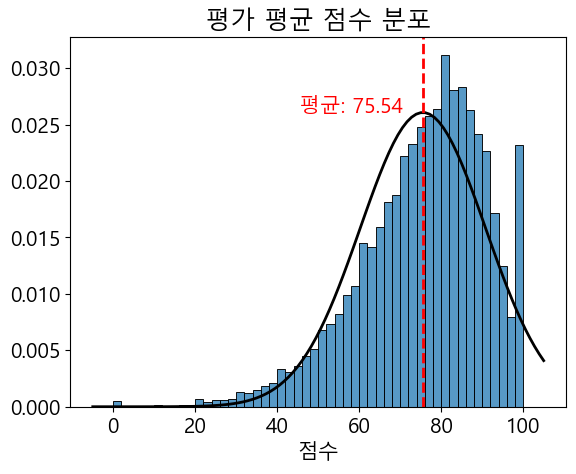

In [83]:
from scipy.stats import norm

# 데이터셋에서 평균과 표준편차 계산
mean = processed_df2['test_average_score'].mean()
std = processed_df2['test_average_score'].std()

# 히스토그램 그리기
sns.histplot(processed_df2['test_average_score'], kde=False, stat='density', bins=50)

# 정규분포 곡선 그리기
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

# 평균값에 선 그리기
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)

# 평균점수 표시
plt.text(mean - mean*0.4, max(p), f'평균: {mean:.2f}', color = 'red')

# 그래프 제목과 축 레이블 설정
plt.title('평가 평균 점수 분포')
plt.xlabel('점수')
plt.ylabel('')

# 그래프 표시
plt.show()

**wrong_count**
- 결측치 0으로 채우기

In [84]:
processed_df2['wrong_count'].value_counts().sort_index()

wrong_count
1.0      8656
2.0      5640
3.0      4329
4.0      3653
5.0      3330
         ... 
158.0       1
166.0       1
176.0       1
185.0       1
218.0       1
Name: count, Length: 112, dtype: int64

In [85]:
processed_df2['wrong_count'] = processed_df2['wrong_count'].fillna(0)

In [86]:
# 최종 결측치 개수와 비율 확인
null_cnt_df = pd.DataFrame(processed_df2.isnull().sum()).rename(columns={0:'결측치 개수'}).reset_index()
null_cnt_df['결측치 비율'] = round(null_cnt_df['결측치 개수']/len(processed_df2)*100, 2)
null_cnt_df

,index,결측치 개수,결측치 비율
0,userid,0,0.0
1,gender,0,0.0
2,grade_codename,0,0.0
3,memberstatus_codename,0,0.0
4,무료회원_유지기간,0,0.0
5,유료회원_유지기간,0,0.0
6,중지회원_유지기간,0,0.0
7,만료회원_유지기간,0,0.0
8,point_gain_count,0,0.0
9,point_loss_count,0,0.0


### 2-2-3. 시각화

In [87]:
processed_df2

,userid,gender,grade_codename,memberstatus_codename,무료회원_유지기간,유료회원_유지기간,중지회원_유지기간,만료회원_유지기간,point_gain_count,point_loss_count,study_count,total_system_learning_time,test_count,test_average_score,wrong_count
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초6,만료회원,0,0,0,30,0.0,1.0,2.423499,8404.0,2.861067,69.275660,0.0
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초6,만료회원,0,0,0,30,0.0,1.0,2.423499,8404.0,2.861067,77.374822,0.0
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초2,만료회원,2,0,0,28,2.0,0.0,3.521711,8404.0,3.453512,83.809735,0.0
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,F,초3,만료회원,0,0,0,30,0.0,1.0,2.423499,8404.0,2.861067,37.198022,0.0
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,M,초5,만료회원,15,0,0,12,18.0,0.0,2.000000,694.0,1.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211846,897aecf4-f213-48d3-9ee9-bbf7a3015313,F,초3,회원,0,30,0,0,66.0,0.0,55.000000,20749.0,24.000000,74.080000,0.0
211847,89949613-340b-4d8d-9a16-450d35f95e25,F,초3,회원,0,30,0,0,111.0,0.0,76.000000,30970.0,52.000000,66.690000,0.0
211848,899b9567-69b2-484c-87a8-368bb31ed469,M,초1,회원,0,30,0,0,189.0,0.0,110.000000,52420.0,54.000000,83.780000,0.0
211849,89bb2f78-b0da-4cfa-9e8c-793656ad2c63,M,초5,회원,0,30,0,0,147.0,0.0,55.000000,26551.0,37.000000,82.840000,18.0


**학년 별 학습횟수 평균과 평균점수**

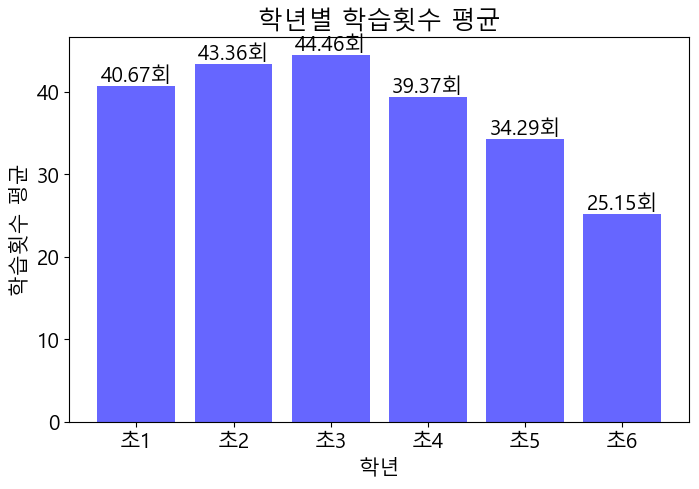

In [88]:
# grade_codename별로 study_count의 평균 계산
grade_study_avg = processed_df2.groupby('grade_codename')['study_count'].mean()

# 막대그래프로 시각화
plt.figure(figsize=(8, 5))

# study_count 평균을 막대그래프로 그립니다.
bars = plt.bar(grade_study_avg.index, grade_study_avg.values, color='b', alpha=0.6, label='학습횟수 평균')

# 막대그래프 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}회', ha='center', va='bottom')

# 레이블 설정
plt.title('학년별 학습횟수 평균')
plt.xlabel('학년')
plt.ylabel('학습횟수 평균')
plt.xticks(grade_study_avg.index)

plt.show()

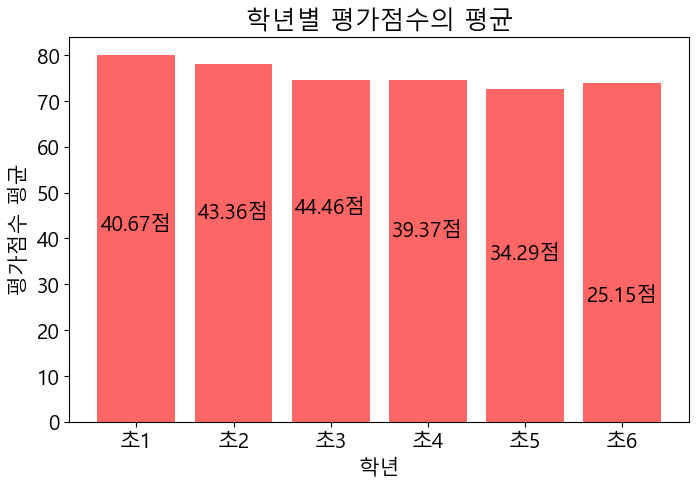

In [89]:
# grade_codename별로 study_count의 평균과 test_average_score의 평균을 계산합니다.
grade_test_avg = processed_df2.groupby('grade_codename')['test_average_score'].mean()

# 막대그래프로 시각화
plt.figure(figsize=(8, 5))
plt.bar(grade_test_avg.index, grade_test_avg.values, color='r', alpha=0.6, label='평가점수 평균')

# 막대그래프 위에 값 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}점', ha='center', va='bottom')

# 레이블 설정
plt.title('학년별 평가점수의 평균')
plt.xlabel('학년')
plt.ylabel('평가점수 평균')
plt.xticks(grade_study_avg.index)

plt.show()



### 2-2-4. 인코딩

In [90]:
processed_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184134 entries, 0 to 211850
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   userid                      184134 non-null  object 
 1   gender                      184134 non-null  object 
 2   grade_codename              184134 non-null  object 
 3   memberstatus_codename       184134 non-null  object 
 4   무료회원_유지기간                   184134 non-null  int64  
 5   유료회원_유지기간                   184134 non-null  int64  
 6   중지회원_유지기간                   184134 non-null  int64  
 7   만료회원_유지기간                   184134 non-null  int64  
 8   point_gain_count            184134 non-null  float64
 9   point_loss_count            184134 non-null  float64
 10  study_count                 184134 non-null  float64
 11  total_system_learning_time  184134 non-null  float64
 12  test_count                  184134 non-null  float64
 13  test_average_score 

**범주형 변수 레이블 인코딩**

In [91]:
processed_df2['gender'].unique()

array(['F', 'M'], dtype=object)

In [92]:
processed_df2['gender'] = processed_df2['gender'].replace({'F': 0, 'M': 1})

In [93]:
processed_df2['grade_codename'].unique()

array(['초6', '초2', '초3', '초5', '초1', '초4'], dtype=object)

In [94]:
processed_df2['grade_codename'] = processed_df2['grade_codename'].str[-1].astype(int)

In [95]:
processed_df2['memberstatus_codename'].unique()

array(['만료회원', '회원'], dtype=object)

In [96]:
processed_df2['memberstatus_codename'] = processed_df2['memberstatus_codename'].replace({'만료회원': 0, '회원': 1})

## 2-3. 데이터 활용 아이디어

- 학생별 평가 평균 점수 예측하기 (선형 회귀)


- 유사한 학습 횟수를 가지는 학생 군집화

In [97]:
final_df2 = processed_df2.reset_index().drop(columns={'index'})
final_df2

,userid,gender,grade_codename,memberstatus_codename,무료회원_유지기간,유료회원_유지기간,중지회원_유지기간,만료회원_유지기간,point_gain_count,point_loss_count,study_count,total_system_learning_time,test_count,test_average_score,wrong_count
0,008c6dd3-23f5-47f2-bf12-786243927bd5,0,6,0,0,0,0,30,0.0,1.0,2.423499,8404.0,2.861067,69.275660,0.0
1,027a7135-be16-4574-a826-5e4b34eed8a0,1,6,0,0,0,0,30,0.0,1.0,2.423499,8404.0,2.861067,77.374822,0.0
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,1,2,0,2,0,0,28,2.0,0.0,3.521711,8404.0,3.453512,83.809735,0.0
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,0,3,0,0,0,0,30,0.0,1.0,2.423499,8404.0,2.861067,37.198022,0.0
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,1,5,0,15,0,0,12,18.0,0.0,2.000000,694.0,1.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184129,897aecf4-f213-48d3-9ee9-bbf7a3015313,0,3,1,0,30,0,0,66.0,0.0,55.000000,20749.0,24.000000,74.080000,0.0
184130,89949613-340b-4d8d-9a16-450d35f95e25,0,3,1,0,30,0,0,111.0,0.0,76.000000,30970.0,52.000000,66.690000,0.0
184131,899b9567-69b2-484c-87a8-368bb31ed469,1,1,1,0,30,0,0,189.0,0.0,110.000000,52420.0,54.000000,83.780000,0.0
184132,89bb2f78-b0da-4cfa-9e8c-793656ad2c63,1,5,1,0,30,0,0,147.0,0.0,55.000000,26551.0,37.000000,82.840000,18.0


**수치형 변수 스케일링**

In [98]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 표준화할 변수
cols = final_df2.iloc[:, 4:].columns.tolist()

# 스케일러 객체 생성
scaler = StandardScaler()

# 수치형 변수에 대해 표준화 수행
final_df2[cols] = scaler.fit_transform(final_df2[cols])

In [99]:
final_df2.describe()

,gender,grade_codename,memberstatus_codename,무료회원_유지기간,유료회원_유지기간,중지회원_유지기간,만료회원_유지기간,point_gain_count,point_loss_count,study_count,total_system_learning_time,test_count,test_average_score,wrong_count
count,184134.000000,184134.000000,184134.000000,1.841340e+05,1.841340e+05,1.841340e+05,1.841340e+05,1.841340e+05,1.841340e+05,1.841340e+05,1.841340e+05,1.841340e+05,1.841340e+05,1.841340e+05
mean,0.553858,3.526095,0.518242,-6.050653e-17,1.333613e-16,-2.160948e-17,9.384687e-17,1.951027e-16,-3.580999e-17,2.716620e-17,9.878618e-17,-5.186274e-17,-1.192766e-15,-2.840103e-17
std,0.497092,1.660794,0.499668,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,0.000000,1.000000,0.000000,-3.181343e-01,-1.020493e+00,-6.798675e-02,-8.534433e-01,-8.795355e-01,-3.901227e-01,-8.471520e-01,-1.154299e+00,-8.752287e-01,-4.935899e+00,-5.212537e-01
25%,0.000000,2.000000,0.000000,-3.181343e-01,-1.020493e+00,-6.798675e-02,-8.534433e-01,-8.795355e-01,-3.901227e-01,-8.145834e-01,-4.935196e-01,-7.978964e-01,-5.793154e-01,-5.212537e-01
50%,1.000000,4.000000,1.000000,-3.181343e-01,-8.284310e-02,-6.798675e-02,-8.534433e-01,-3.775102e-01,-1.026534e-01,-3.895666e-01,-4.935196e-01,-5.012544e-01,1.484212e-01,-5.212537e-01
75%,1.000000,5.000000,1.000000,-3.181343e-01,1.011081e+00,-6.798675e-02,1.305221e+00,7.215182e-01,-1.026534e-01,6.171214e-01,3.363078e-01,6.622212e-01,7.275941e-01,9.152122e-02
max,1.000000,6.000000,1.000000,7.212667e+00,1.401769e+00,2.063286e+01,1.377176e+00,1.973064e+01,4.646738e+01,3.415813e+01,4.500698e+00,4.786609e+01,1.598649e+00,2.619573e+01


### 2-3-1. 학생별 평가 평균 점수 예측하기 (선형 회귀)

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**데이터 분할**

In [101]:
X = final_df2.drop(['userid', 'test_average_score'], axis=1)  # 'userid'와 'test_average_score' 컬럼 제외
y = final_df2['test_average_score']

# 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**모델 학습(선형 회귀)**

In [105]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

**모델 평가**

In [106]:
# 테스트 데이터에 대한 예측
y_pred = lin_reg.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.9318695360006588
R^2 Score: 0.07852212736886666


**모델 학습(랜덤 포레스트)**

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

**모델 평가**

In [109]:
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R^2 Score: {rf_r2}")

Random Forest Mean Squared Error: 0.8895822405639217
Random Forest R^2 Score: 0.12033785965002286


**모델 학습(그래디언트 부스팅)**

In [107]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

**모델 평가**

In [108]:
gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
print(f"Gradient Boosting Mean Squared Error: {gb_mse}")
print(f"Gradient Boosting R^2 Score: {gb_r2}")

Gradient Boosting Mean Squared Error: 0.8890384080821212
Gradient Boosting R^2 Score: 0.12087562763045057


### 2-3-2. 유사한 학습 횟수를 가지는 학생 군집화

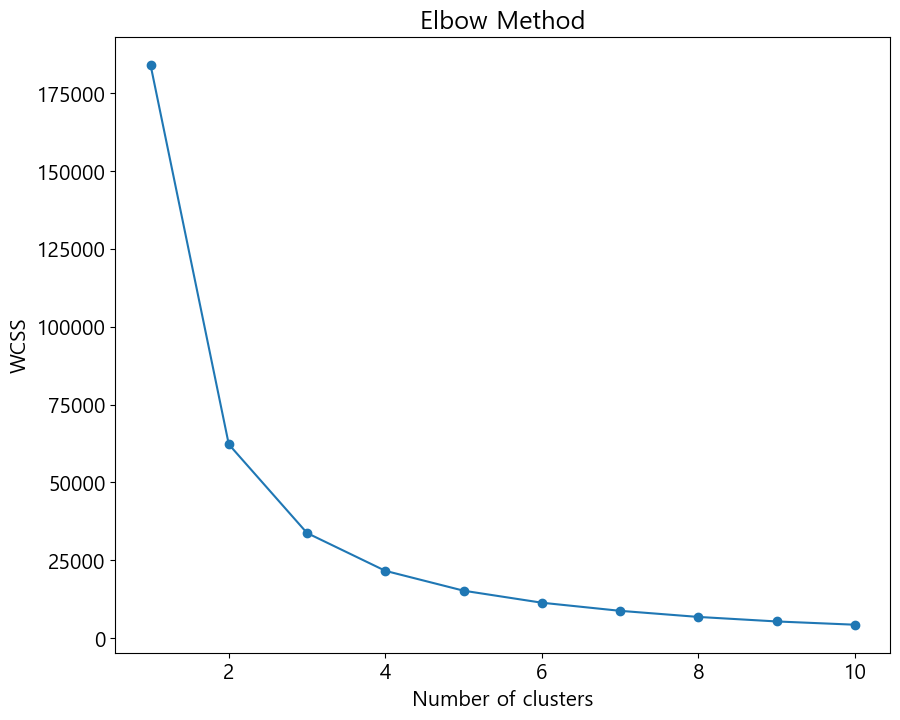

In [110]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = final_df2[['study_count']]

# 엘보우 방법을 사용하여 적절한 클러스터 수 추정
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS to find the elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)


In [112]:
kmeans.cluster_centers_

array([[-0.69312888],
       [ 2.30846503],
       [ 0.65461111]])

In [116]:
# Check the silhouette score
print('Silhouette Score:', silhouette_score(X, y_pred))

Silhouette Score: 0.7085237956158077


In [117]:
# 군집의 수가 1부터 10인 kmeans 돌림.
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)] 

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

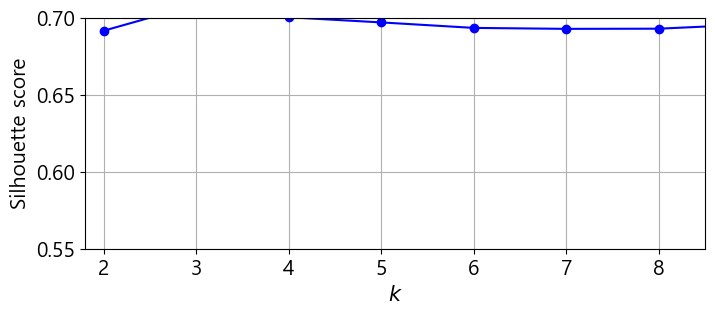

In [119]:
# 실루엣 점수 시각화
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]] # 군집의 수(1~10)에 따른 실루엣 점수를 저장.

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()

plt.show()

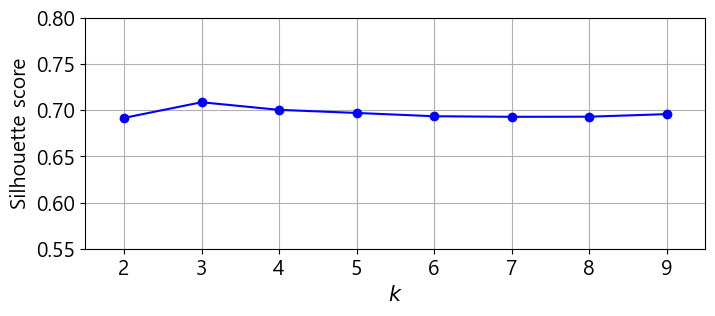

In [121]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.5, 9.5, 0.55, 0.8])
plt.grid()
plt.show()

# 3. 학생별 과목별 점수 데이터

4일차 GMM을 통한 학생 수준별 군집화 실습을 통해 사용했던 데이터! --> 중1 데이터


본 데이터는 중2 데이터

## 3-1. 데이터 불러오기

In [58]:
dataset3 = pd.read_csv('./datasets/중2_AI진단평가_과목별점수.csv',index_col=0)
dataset3.head()

,응시기간,시험명,학년,응시일자,전체,국어,영어,수학,과학,사회,역사
0,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-23 00:00:00,338,68,93.0,71.0,NaN,53.0,53.0
1,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-23 00:00:00,50,18,0.0,9.0,NaN,23.0,NaN
2,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-23 00:00:00,65,29,36.0,NaN,NaN,NaN,NaN
3,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-24 00:00:00,276,75,72.0,76.0,NaN,38.0,15.0
4,2021. 12 ~2022. 12,AI진단평가,중2,2021-12-26 00:00:00,29,29,0.0,0.0,NaN,0.0,0.0


## 3-3. 데이터 활용 아이디어

- 데이터 핸들링 하기 (시각화, groupby 등 다양한 전처리 연습하기)


- 유사 사용자 클러스터링 하기